In [13]:
import icepyx as ipx
# import os
# import shutil
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.linear_model import LinearRegression as LR
%load_ext autoreload

%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# polygon vertices (here equivalent to the bounding box, above)
short_name = 'ATL08'
spatial_extent = [(115,-37), (115,-15), (152, -15), (152, -37),(115, -37)]
date_range = ['2021-04-28','2021-5-28']

In [18]:
region_a = ipx.Query(short_name, spatial_extent, date_range)

In [19]:


# using orbital parameters with one of the above data products + spatial parameters
#region_a = ipx.Query(short_name, spatial_extent)

print(region_a.product)
print(region_a.product_version)
print(region_a.cycles)
print(region_a.tracks)



ATL08
006
['No orbital parameters set']
['No orbital parameters set']


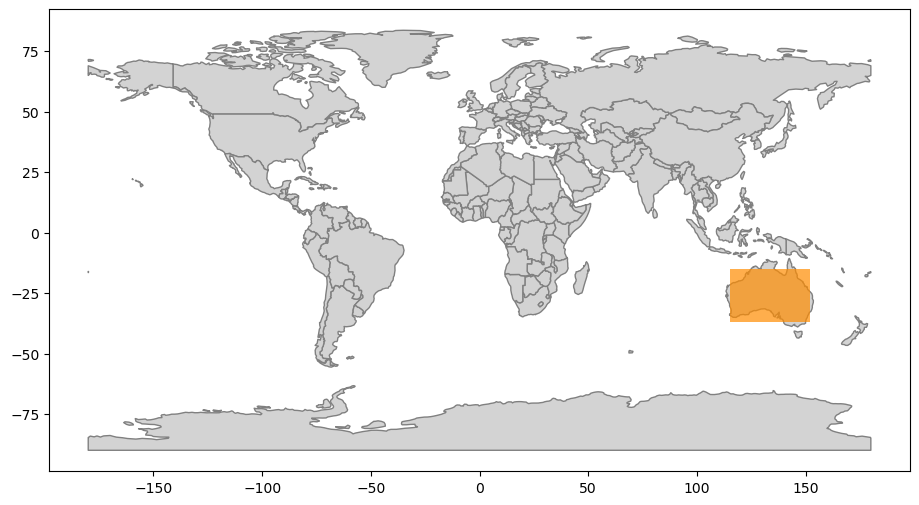

In [20]:
# print(region_a.spatial_extent)
region_a.visualize_spatial_extent()

In [21]:
region_a = ipx.Query(short_name, spatial_extent, date_range)


In [ ]:

region_a.earthdata_login()

In [9]:
region_a.CMRparams
region_a.subsetparams()
region_a.order_granules()

Total number of data order requests is  1  for  205  granules.
Data request  1  of  1  is submitting to NSIDC
order ID:  5000004078323
Initial status of your order request at NSIDC is:  processing
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is: complete
NSIDC returned these messages
['Granu

In [23]:
f = h5py.File('eyre_ice/processed_ATL08_20210323235208_13741009_005_01.h5') 
print(f.keys())
data = f

NameError: name 'h5py' is not defined

In [24]:
path_root = './foder'
pattern = "processed_ATL{product:2}_{datetime:%Y%m%d%H%M%S}_{rgt:4}{cycle:2}{orbitsegment:2}_{version:3}_{revision:2}.h5"
reader = ipx.Read(path_root, "ATL08", pattern) # or ipx.Read(filepath, "ATLXX") if your filenames match the default pattern

You have 432 files matching the filename pattern to be read in.


In [25]:
reader.vars.append(beam_list=['gt3l', 'gt3r','gt2l', 'gt2r','gt1l', 'gt1r'], var_list=['dem_h', "latitude", "longitude"])

In [26]:
ds = reader.load()

/Users/gr_1/miniconda3/lib/python3.9/site-packages/icepyx/core/read.py:49: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  df.update({keyword: df[keyword].str[:-1].astype(np.datetime64)})
/Users/gr_1/miniconda3/lib/python3.9/site-packages/icepyx/core/read.py:49: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values 

In [15]:
ds.plot.scatter(x="longitude", y="latitude", hue="dem_h",s=.1)


KeyboardInterrupt



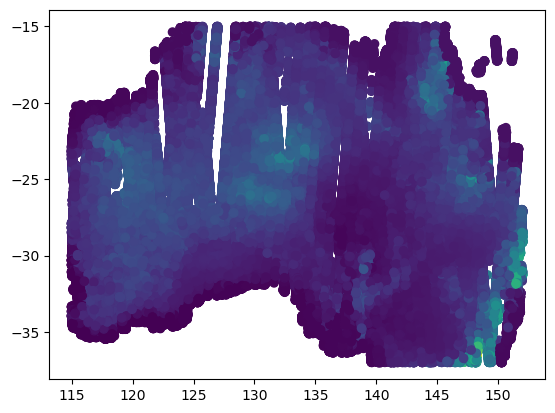

In [6]:

y=np.array(ds.latitude).ravel()
x=np.array(ds.longitude).ravel()
z=np.array(ds.dem_h).ravel()
I = np.where((x>-9999) | (y>-99999) | (z>-9999))
x=x[I]
y=y[I]
z=z[I]
I=np.arange(len(x))
I=np.random.choice(I,500000)
x=x[I]
y=y[I]
z=z[I]
plt.scatter(x, y, c=z)


In [3]:

lakes = gpd.read_file('lakes_aus.shp')


<Axes: >

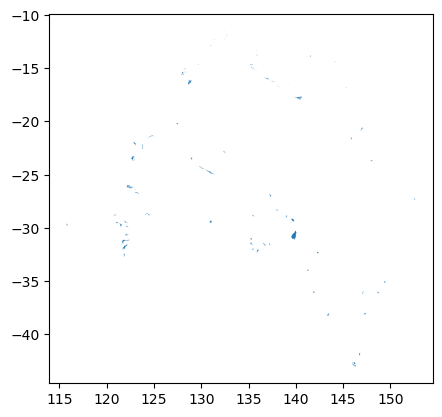

In [5]:
lakes[1:100].plot()

In [19]:
pts = [Point(x[i],y[i]) for i in range(len(x))]
G = gpd.GeoDataFrame(geometry=pts)


In [20]:
# lp = L.geometry[0]
# ly = np.array(lp.exterior.coords.xy[1])
# lx = np.array(lp.exterior.coords.xy[0])
# plt.plot(lx,ly)

In [21]:
I=[]
for i in range(len(lakes)):    
    L = lakes.iloc[i:i+1]
    if (L.area.to_numpy() > 0.01):
        pt_in=G[G.geometry.within(L.iloc[0].geometry.buffer(-.001),align=True)]
        I.append(pt_in.index.to_numpy())
        print(i/len(lakes))


/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


0.0


/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


8.643789437289307e-05
0.00017287578874578615
0.00025931368311867925


/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry i

0.0003457515774915723
0.0004321894718644654


/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


0.0005186273662373585
0.0006050652606102515
0.0006915031549831446


/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry i

0.0007779410493560377
0.0008643789437289308
0.0009508168381018239
0.001037254732474717
0.00112369262684761
0.001210130521220503
0.0012965684155933962
0.0013830063099662892


/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


0.0014694442043391824
0.0015558820987120754
0.0016423199930849684
0.0017287578874578616
0.0019880715705765406


/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry i

0.00224738525369522
0.002333823148068113
0.002420261042441006
0.0025066989368138994
0.0025931368311867924
0.0026795747255596854
0.0027660126199325783


/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry i

0.0028524505143054713
0.0029388884086783648
0.0030253263030512578
0.0031117641974241507
0.0031982020917970437
0.0032846399861699367
0.003457515774915723


/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry i

0.003543953669288616
0.003630391563661509
0.003716829458034402
0.0038032673524072956
0.0038897052467801885
0.003976143141153081
0.0040625810355259745
0.004149018929898868
0.0042354568242717605
0.004321894718644654


/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry i

0.0044083326130175465
0.00449477050739044
0.004581208401763333
0.004667646296136226
0.004754084190509119


/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if (L.area.to_numpy() > 0.01):
/Users/gr_1/miniconda3/lib/python3.9/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/var/folders/5v/804c95h92bx2zr8rfpwyr_yc0000gn/T/ipykernel_27563/563392101.py:4: UserWarning: Geometry i

In [10]:
m=LR()
ms=[]
xm=[]
ym=[]
for i in range(len(I)):
    if len(I[i])>0:
        X = list(zip(x[I[i]],y[I[i]]))
        xm.append(np.mean(x[I[i]]))
        ym.append(np.mean(y[I[i]]))
        ms.append(m.fit(np.array(X),z[I[i]]).coef_)
U =[i[0] for i in ms]
V = [i[1] for i in ms]
xm=np.array(xm)
ym=np.array(ym)
U=np.array(U)
V=np.array(V)


In [15]:
io = np.argmax(U)
U[io]=0


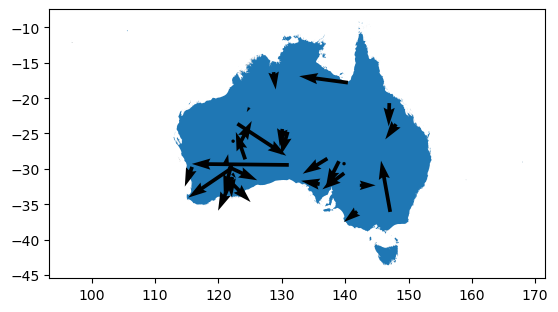

In [16]:
aus = gpd.read_file('AUS_2021_AUST_SHP_GDA2020/AUS_2021_AUST_GDA2020.shp')
aus.plot()
xy = list(zip(xm,ym))
plt.quiver(xm, ym, -U, -V)

In [ ]:
## LR